## Ultimate Technologies Inc. Challenge

In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# import data file
logins = pd.read_json('logins.json')
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
logins.set_index('login_time', inplace=True)
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [4]:
# Aggregate the logins in 15 minutes intervals
logins['count'] = 1
logins_15mins = logins.resample("15min").count()
logins_15mins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<AxesSubplot:xlabel='login_time'>

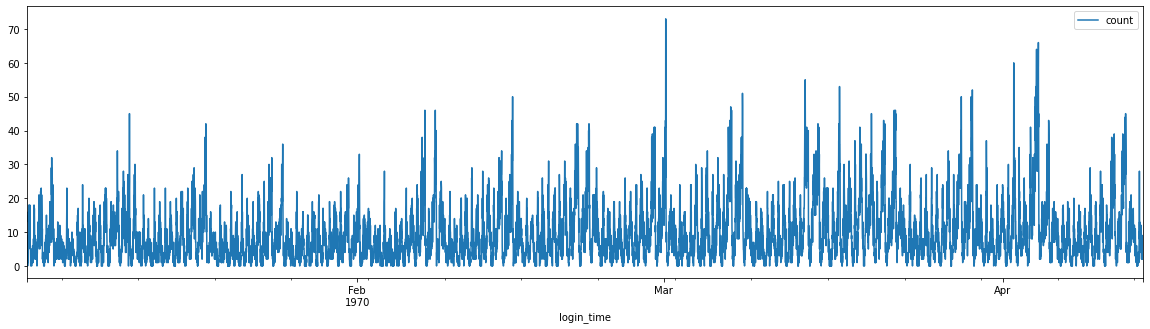

In [5]:
# Plot the time series in 15 minutes intervals
logins_15mins.plot(figsize=(20,5))

We can see some patterns in the time series.  Let's zoom in and look into each month.

<AxesSubplot:xlabel='login_time'>

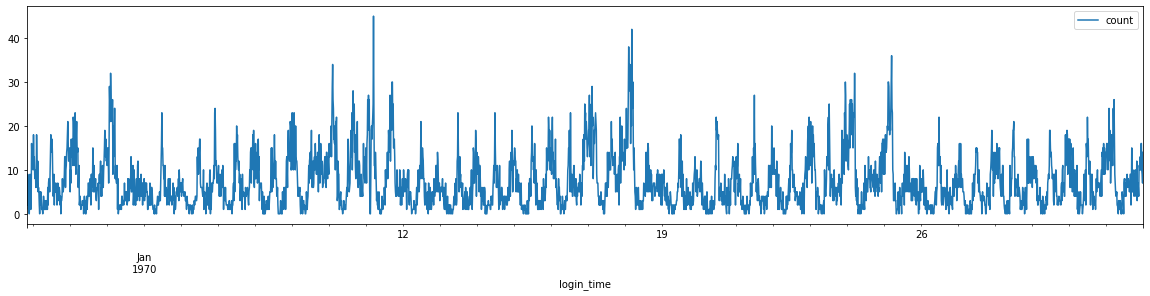

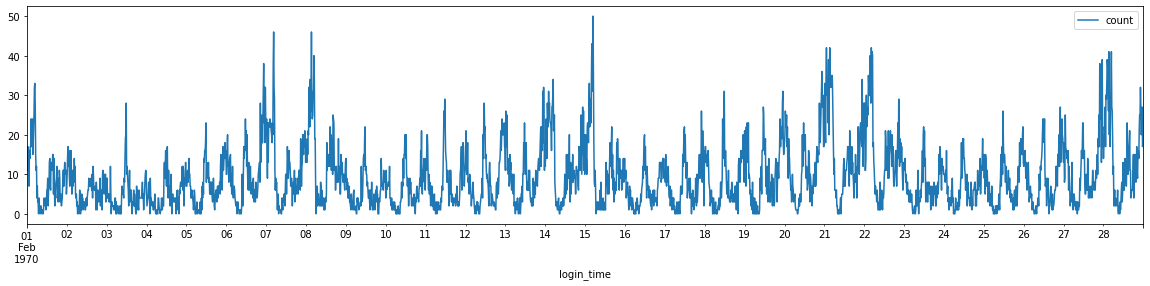

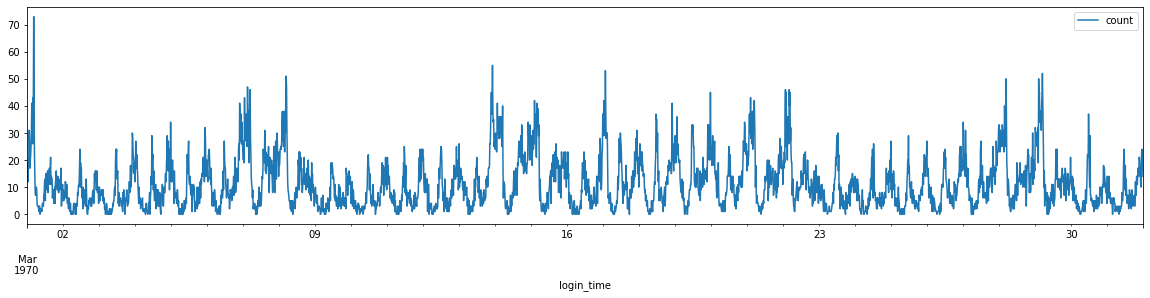

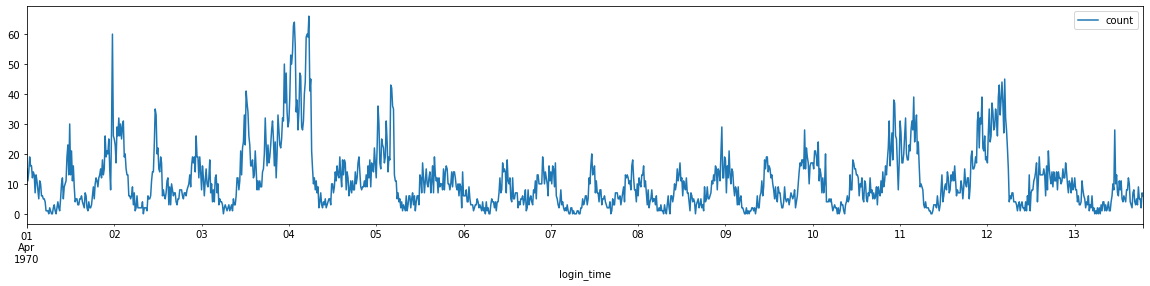

In [6]:
# Plot by month
jan_15mins = logins_15mins.loc[logins_15mins.index.strftime('%b') =='Jan', :]
feb_15mins = logins_15mins.loc[logins_15mins.index.strftime('%b') =='Feb', :]
mar_15mins = logins_15mins.loc[logins_15mins.index.strftime('%b') =='Mar', :]
apr_15mins = logins_15mins.loc[logins_15mins.index.strftime('%b') =='Apr', :]

jan_15mins.plot(figsize=(20,4))
feb_15mins.plot(figsize=(20,4))
mar_15mins.plot(figsize=(20,4))
apr_15mins.plot(figsize=(20,4))

Looks like the time series has some seasonality.  Let's try it with the Dickey-Fuller test.

In [7]:
# p-value of the Dickey-Fuller test
adfuller_result = adfuller(logins_15mins['count'])
adfuller_result[1]

2.7323966542232607e-18

Since the p-value is very close to zero, the time series does not follow a random walk.  We can say that there is seasonality in the time series.

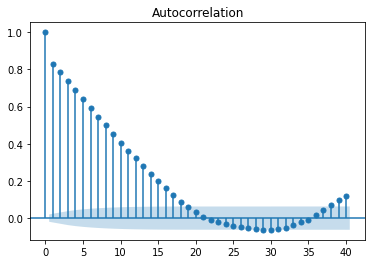

In [8]:
# Plot the autocorrelation function
plot_acf(logins_15mins, alpha=0.05)
plt.show()

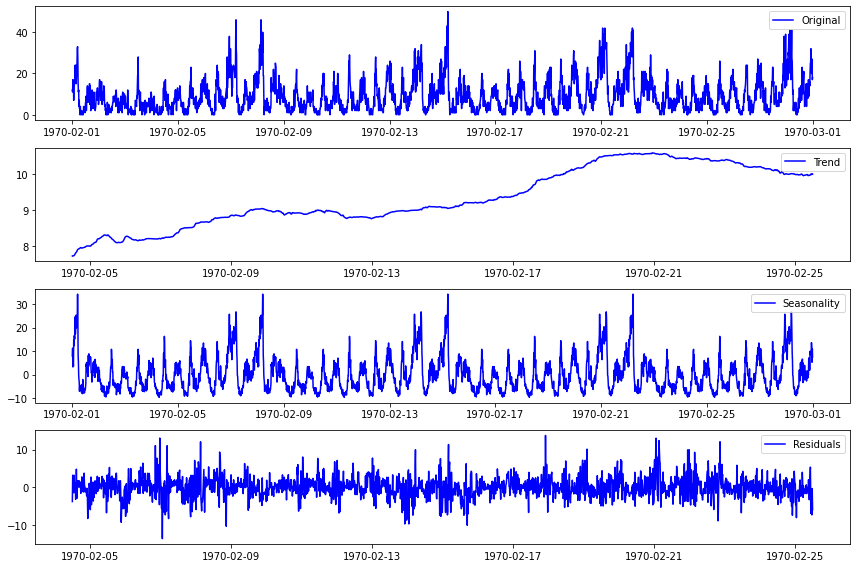

In [9]:
# Analyze the month of February
decomposition = seasonal_decompose(feb_15mins['count'], model='additive', period = 672)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(feb_15mins['count'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

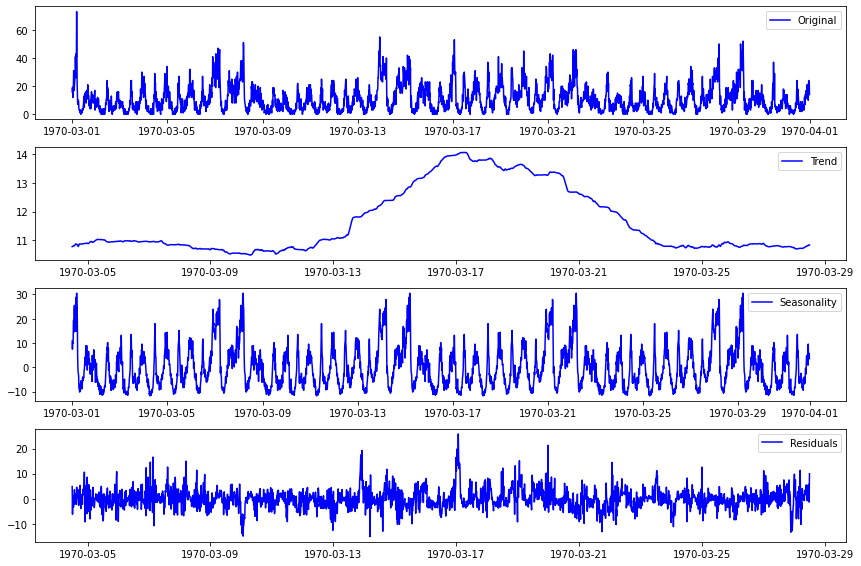

In [10]:
# Analyze the month of March
decomposition = seasonal_decompose(mar_15mins['count'], model='additive', period = 672)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(mar_15mins['count'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

<AxesSubplot:xlabel='login_time'>

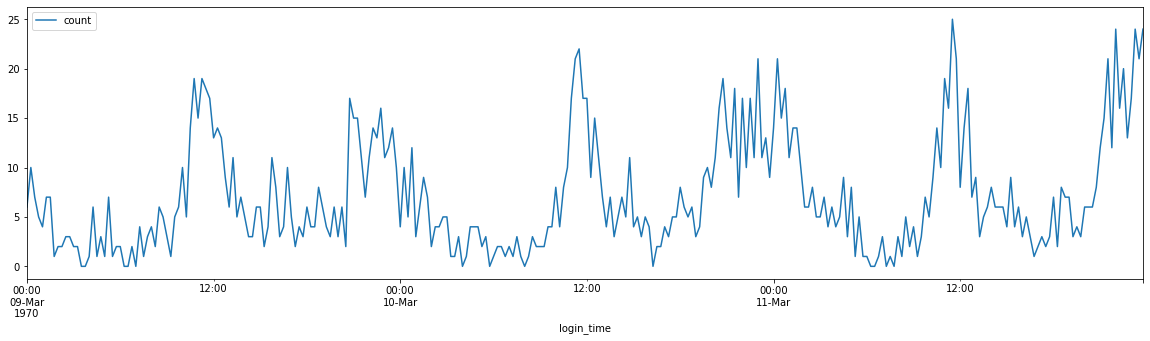

In [11]:
# Zoom into three days
threedays_15mins = logins_15mins.loc[logins_15mins.index.strftime('%b-%d').isin(['Mar-09', 'Mar-10', 'Mar-11'])]
threedays_15mins.plot(figsize=(20,5))

We see that the user usage peaks at around noon and midnight.